# <code style="color:Crimson">3. PRINCIPAL COMPONENT ANALYSIS</code>


## Importing the libraries

In [20]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn (added later)
from sklearn.decomposition import PCA

#### Read the dataset

In [2]:
# Read item_data.csv
item_data = pd.read_csv('item_data.csv',index_col=0)

In [3]:
# Display top 5 rows
item_data.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444,0,0,0,2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
17508,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3



#### A. Let's scale <code style="color:crimson">item_data</code>
* Name the scaled dataset <code style="color:crimson">item_data_scaled</code>.
* Then, display the first 5 rows. 

In [ ]:
# Check shape 
item_data.shape

In [5]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

In [6]:
# Fit and transform item_data
item_data_scaled = scaler.fit_transform(item_data)

In [7]:
# Display first 5 rows of item_data_scaled
print( item_data_scaled[:5] )

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

In [8]:
# Check shape again
item_data_scaled.shape

(414, 2574)

#### B. Next, let's initialize and fit an instance of the PCA transformation.
* Keeping all of the components for now (without passing in any argument).

In [9]:
# Initialize and fit a PCA transformation
PCA = PCA()

In [10]:
PCA.fit(item_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### C. Finally, let's generate a new "principal component features" from <code style="color:crimson">item_data_scaled</code>.
* Name the new array <code style="color:crimson">PC_items</code>.
* Then, display the first 5 rows.

In [11]:
# Generate new features
PC_items = PCA.transform(item_data_scaled)

In [12]:
# Display first 5 rows
PC_items.head()

array([[ 5.87614052e+00,  4.82891689e+00, -4.95545069e-01, ...,
        -6.62646278e-04, -4.43629806e-05,  7.79931675e-15],
       [-4.21983747e+00,  1.22621722e+00, -1.88191211e+00, ...,
        -2.11471782e-04, -2.69154340e-04, -4.33507397e-15],
       [-1.26084676e+00,  2.38766371e+00, -7.31483440e-02, ...,
         2.57750179e-04, -2.05682324e-04, -5.17554749e-15],
       ...,
       [-5.21816182e+00,  3.64837894e+00,  2.50643421e+00, ...,
         2.97765229e-04, -2.14214577e-06, -4.21884749e-15],
       [-4.93612992e+00,  3.02167496e+00, -1.50715580e+00, ...,
         3.14242326e-04, -3.98525350e-05,  1.11022302e-16],
       [-6.04237234e+00, -2.91369265e-01, -6.74022034e-01, ...,
        -2.36796029e-02,  3.91626698e-04,  4.38885039e-16]])

## <span style="color:RoyalBlue">Explained Variance</span>

Display the **explained variance ratio** for each of the principal components.
* First of all, they should sum to 1.0 or very close to it.

<br>
<br>

#### A. Let's confirm the sum of the explained variance ratios for our principal components is 1.

In [13]:
# Sum of explained variance ratio
PCA.explained_variance_ratio_.sum()

0.9999999999999999

PCA finds a **sequence** of principal components that try to explain as much variance as possible.
* $PC1$ would explain the most variance.
* $PC2$ would explain the 2nd-most variance.
* $PC3$ would explain the 3rd-most variance.
* And so on...

<br>
<br>

#### B. Therefore, it's very helpful to calculate and plot the <u>cummulative</u> explained variance.
* This will tell us the total amount of variance we'd capture if we kept up to the n-th component.
* First, take the <code style="color:steelblue">np.cumsum()</code> to calculate the cumulative explained variance. 
* Then, we'll plot it so we can see how many $PC$ features we'd need to keep in order to capture most of the original variance.

In [14]:
# Cumulative explained variance
variance = np.cumsum(PCA.explained_variance_ratio_)

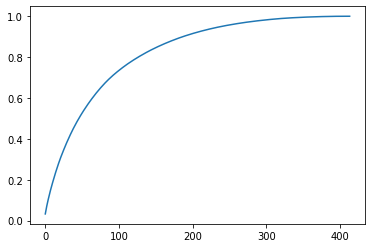

In [15]:
# Plot cumulative explained variance
plt.plot(range(len(variance)), variance)

This chart is saying: To capture about 80% of the variance, we'd need to keep around 125 components.

<br>
<br>

#### C. Let's display the cummulative explained variance of the first 125 components.

In [16]:
# How much variance we'd capture with the first 125 components
variance[125]

0.7977164839441884

## <span style="color:RoyalBlue">Dimensionality Reduction With PCA</span>

Reducing 2574 features down to 125 (about 95% fewer features) while capturing almost 80% of the original variance.

<br>
<br>

#### A. Initialize and fit another PCA transformation.
* This time, only keeping 125 components.
* Generate the principal component features from the fitted instance and name the new matrix <code style="color:crimson">PC_items</code>.

In [21]:
# Initialize PCA transformation, only keeping 125 components
PCA = PCA(n_components=125)

In [23]:
# Fit and transform item_data_scaled
PC_items = PCA.fit_transform(item_data_scaled)

# Display shape of PC_items
PC_items.shape

(414, 125)

#### B. Next, for convenience, we'll put <code style="color:crimson">PC_items</code> into a new dataframe.
* Name the columns PC1, PC2, PC3, etc...
* Update its index to be the same as the orginal <code style="color:crimson">item_data</code>'s index.


In [24]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

In [25]:
# Name the columns
items_pca.columns = ['PC{}'.format(i+1) for i in range (PC_items.shape[1])] 

In [27]:
# Update its index
items_pca.index = df.index

# Display first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,5.876140,4.828935,-0.495530,3.093853,-0.633742,-11.534097,2.162041,7.116835,5.336017,4.424320,...,0.137484,-0.530371,-0.909291,0.093679,0.066484,0.072598,0.115666,-0.059309,0.071256,0.488031
12348,-4.219839,1.226254,-1.881912,-0.174253,0.817994,1.160496,-0.871735,-0.846627,0.460287,0.854451,...,-0.745856,-2.214455,0.304772,-0.809960,-0.485685,0.809214,-1.222510,-0.366409,-0.238031,-1.335611
12349,-1.260838,2.387586,-0.073386,-1.118723,-0.034337,-3.714927,-0.343052,-0.148121,-0.790164,-0.379290,...,-3.512454,5.143853,-1.474347,-1.398795,4.270899,2.394883,0.989950,-2.284587,-2.558743,-0.129946
12350,-4.929323,-0.714907,-1.580879,-0.469915,-0.116540,0.647639,0.112684,-1.336288,1.547293,-1.190387,...,-0.343885,-0.562362,1.263904,1.901519,-0.019063,-1.094445,-0.470259,0.349862,-1.525470,1.855333
12352,-2.053101,2.111276,0.185305,0.128312,0.088353,-1.944069,2.384094,0.898849,-0.672069,0.078339,...,5.961913,-3.435369,0.197666,-1.231175,-3.320967,-1.141511,-0.781454,-4.313632,1.776122,1.003911


Now we have a dataframe of **125 customer-level principal component features**. These were generated from the 125 principal components that explained the most variance for the original features. The index of this PCA item dataframe contains CustomerID's, which will make it possible for us to join this to our <span style="color:royalblue">analytical base table</span>.

<br>
<br>

#### C. Finally, we'll save this item dataframe with PCA features as <code style="color:crimson">'pca_item_data.csv'</code>.
* In our Clustering Analysis module, we'll compare the clusters made from using these features against those in <code style="color:crimson">'threshold_item_data.csv'</code>.
* We will not set <code style="color:steelblue">index=None</code> because we want to keep the CustomerID's as the index.

In [28]:
# Save pca_item_data.csv
items_pca.to_csv('pca_item_data.csv')